# Installs

# Treat Clinical notes

In [1]:
# Standard library imports
import os
import re
import requests 
import pickle 
from tqdm import tqdm 

# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# openAI API library
from openai import OpenAI

# NLTK imports
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Download required NLTK data files (run only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/antoniocoelho/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Read files into a Data Frame

In [5]:
repo_location = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/NLP/Computers%20dont%20read%20numbers/"
files_list = requests.get(repo_location+"directories.txt")
files_list  = files_list.text.split("\n")
notes = []
# run this cells only once this can be blocked by github if a lot of runs are tried
for file in tqdm(files_list[:15]):

    note = requests.get(repo_location+"/data/"+file)
    notes.append(note.text)

100%|██████████| 15/15 [00:07<00:00,  2.10it/s]


In [14]:
# Here everything is done dont worry
# replacement of None Values Exercise
def replace_placeholders(text, placeholder="___", replacement="None"):
    return text.replace(placeholder, replacement)

# Extracting key information using regex
def extract_information(text):
    info = {}
    patterns = {
        "Name": r"Name:\s+(.*?)\s+Unit No",
        "Unit No": NotImplementedError,
        "Admission Date": r"Admission Date:\s+(.*?)\s+Discharge Date",
        "Discharge Date": NotImplementedError,
        "Date of Birth": r"Date of Birth:\s+(.*?)\s+Sex",
        "Sex": NotImplementedError,
        "Service": r"Service:\s+(.*?)\n",
        "Allergies": r"Allergies:\s+(.*?)\n",
        "Chief Complaint": r"Chief Complaint:\n(.*?)\n",
        "Major Surgical or Invasive Procedure": r"Major Surgical or Invasive Procedure:\n(.*?)\n",
        "History of Present Illness": r"History of Present Illness:\n(.*?)\n\n",
        "Review of systems": r"Review of systems:\s+(.*?)\n\n",
        "Past Medical History": r"Past Medical History:\n(.*?)\n\n",
        "Social History": r"Social History:\n(.*?)\n",
        "Family History": r"Family History:\n(.*?)\n\n",
        "Physical Exam": r"Physical Exam:\n(.*?)\n\n",
        "Brief Hospital Course": r"Brief Hospital Course:\n(.*?)\n\n",
        "Discharge Diagnosis": r"Discharge Diagnosis:\n(.*?)\n\n",
        "Discharge Condition": r"Discharge Condition:\n(.*?)\n\n",
        "Discharge Instructions": r"Discharge Instructions:\n(.*?)\n\n",
    }

    for key, pattern in patterns.items():
        match = re.search(pattern, text, re.DOTALL)
        info[key] = match.group(1).strip() if match else "None"
        
    return info
def structure_data(clinical_text):
    # Replace placeholders in the clinical text
    processed_text = replace_placeholders(clinical_text)

    # Extract information into a dictionary
    return extract_information(processed_text)

structure_notes = [ structure_data(note) for note in notes]


TypeError: first argument must be string or compiled pattern

# Null values treatment

In [17]:
df = pd.DataFrame(structure_notes).replace('None',np.NaN)
df.head(3)

,Name,Unit No,Admission Date,Discharge Date,Date of Birth,Sex,Service,Allergies,Chief Complaint,Major Surgical or Invasive Procedure,History of Present Illness,Review of systems,Past Medical History,Social History,Family History,Physical Exam,Brief Hospital Course,Discharge Diagnosis,Discharge Condition,Discharge Instructions
0,NaN,NaN,NaN,NaN,NaN,F,MEDICINE,Codeine,I feel shaky,NaN,Pt is a None year old woman who presents to ED...,(+) Per HPI. Also notes recent weight gain whi...,"-IDDM c/b retinopathy\n-HTN\n-AFib, diagnosed ...",NaN,"- 6 children, one daughter died last year from...",FEX ON ADMISSION\nVitals: T: 98.4 BP: 176/96 P...,None year old woman with IDDM and AFib on coum...,Lactic acidosis\nHyperglycemia\nUrinary tract ...,Mental Status: Clear and coherent.\nLevel of C...,"Dear Ms. None,"
1,NaN,NaN,NaN,NaN,NaN,M,MEDICINE,Demerol,Dyspnea,Bronchoscopy,This is an None yo M with history of mild deme...,NaN,gastroesophageal reflux disease\nhypercholeste...,NaN,"strong family history of diabetes mellitus, an...","VS: T 98.6max, 97.3current, BP None, HR 79 RR ...",None year old male with complaints of dyspnea...,Lung mass\nAcute renal failure\nHypoxia,"Stable, for home with services.",You were admitted to the hospital because of y...
2,NaN,NaN,NaN,NaN,NaN,F,ORTHOPAEDICS,No Known Allergies / Adverse Drug Reactions,RLE pain,Right short trochanteric fixation nail,"None, blown over by gust of wind w/R ITFx now ...",NaN,MedHx:\n-HTN\n-Hypercholesterolemia\n-Eczema\n...,NaN,"Mother deceased with HTN, CAD. Father deceased...",NaN,The patient presented to the emergency departm...,right intertrochanteric femur fracture,"AAOx3, mentating appropriately, NVI","Weigh yourself every morning, call MD if weigh..."


In [18]:
df.isnull().sum()

Name                                     98
Unit No                                 100
Admission Date                          100
Discharge Date                          100
Date of Birth                           100
Sex                                       0
Service                                   0
Allergies                                 2
Chief Complaint                           3
Major Surgical or Invasive Procedure     29
History of Present Illness                4
Review of systems                        97
Past Medical History                      5
Social History                           98
Family History                            6
Physical Exam                             8
Brief Hospital Course                    10
Discharge Diagnosis                       8
Discharge Condition                       6
Discharge Instructions                   16
dtype: int64

In [19]:
#Select columns with less that 50 null values
df_column_selected = df[df.isnull().sum()[df.isnull().sum()<50].index]
#drop the lines that still have null vaules
df_treated = df_column_selected.dropna(axis=0)

# Complete yourself

In [6]:
# Lets start building a corpus
discharged_diagnosis = ' '.join(df_treated['Discharge Diagnosis'].to_list())

NameError: name 'df_treated' is not defined

In [7]:

# Function to clean individual lines
def clean_line(line):
    # Remove HTML-like tags
    line = NotImplementedError
    # Remove unwanted characters (e.g., non-ASCII characters)
    line = re.sub(r'[^\x00-\x7F]+', '', line)
    # Strip leading/trailing whitespace
    return line.strip()

def speaking_text_cleaner(speaking_text):
    # Process each line to clean it
    cleaned_lines = []
    for line in speaking_text.splitlines():
        cleaned_line = clean_line(line)
        if cleaned_line:  # Only add non-empty lines
            cleaned_lines.append(cleaned_line)
    return "\n".join(cleaned_lines)

cleaned_discharged_diagnosis = speaking_text_cleaner(discharged_diagnosis)

NameError: name 'discharged_diagnosis' is not defined

In [8]:
def corpus_cleaner(cleaned_text,n_min = 4 ):
    n_min = 4                                                           # Minimum number of characters. 
    corpus = []
    lemmatizer = WordNetLemmatizer()

    pre = re.sub(r'\W', ' ', cleaned_text)                          # Substitute the non-alphanumerics character by space. 
                                        # Remove numbers.                                      # Exercise
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.                                 # Exercise
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.
    return corpus

In [9]:
corpus_clean  = corpus_cleaner( cleaned_discharged_diagnosis )

NameError: name 'cleaned_discharged_diagnosis' is not defined

# Count the words

<Axes: >

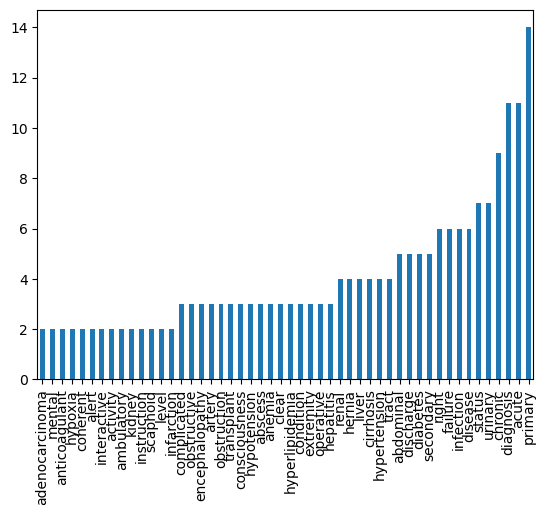

In [25]:
from collections import Counter

# choose words you want to remove
remove_words = ['primary','secondary','going','diagnosis','right']
treated_corpus = [x for x in corpus_clean if x not in remove_words]
pd.Series(Counter(corpus_clean)).sort_values()[-50:].plot(kind='bar')

# Word Cloud

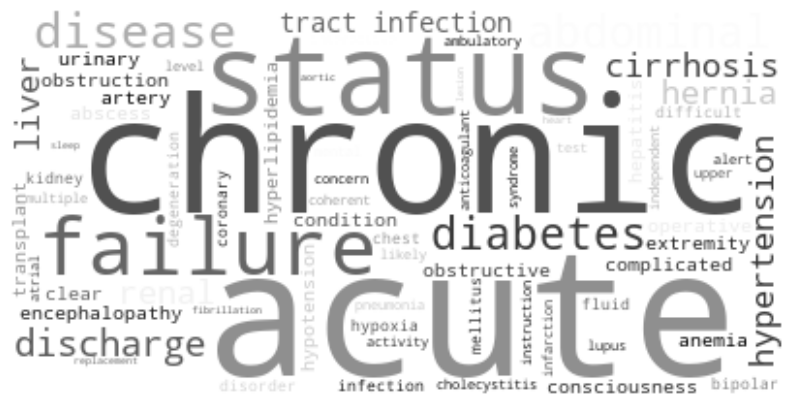

In [26]:
a_long_sentence = ' '.join(treated_corpus)
wc = WordCloud(background_color='white', max_words=70,colormap='gist_gray')                  # Customize the output.
wc.generate(a_long_sentence)
# wc.words_                                                          # Check for the top ranking words.                                                         
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
#plt.savefig('clinical_notes.png',bbox_inches='tight')
plt.show()